In [31]:
import pandas as pd
data = pd.read_csv('processed_train_data.csv')
data

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,...,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SalePrice
0,1,60,0,0,1,65.0,8450,1,0,0,...,0,0,0,0,1,0,0,0,1,208500
1,2,20,0,0,1,80.0,9600,1,0,0,...,0,0,1,0,0,0,0,0,1,181500
2,3,60,0,0,1,68.0,11250,1,0,1,...,0,0,0,0,1,0,0,0,1,223500
3,4,70,0,0,1,60.0,9550,1,0,1,...,0,0,0,0,0,0,0,0,1,140000
4,5,60,0,0,1,84.0,14260,1,0,1,...,0,0,1,0,0,0,0,0,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1455,20,1,0,0,62.0,7500,1,2,0,...,0,0,0,0,1,0,0,0,1,185000
1216,1456,60,0,0,1,62.0,7917,1,0,0,...,0,0,0,0,1,0,0,0,1,175000
1217,1457,20,0,0,1,85.0,13175,1,0,0,...,0,0,0,0,1,0,0,0,1,210000
1218,1459,20,0,0,1,68.0,9717,1,0,0,...,0,0,0,0,1,0,0,0,0,142125


In [36]:
ID, X, Y = data.iloc[:, 0], data.iloc[1:-1, :], data.iloc[:,-1]
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1215    185000
1216    175000
1217    210000
1218    142125
1219    147500
Name: SalePrice, Length: 1220, dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = X.corr()

# plt.figure(figsize=(20, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
# plt.show()
cols = corr.columns
val = corr.values
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(val[i, j]) >= 0.5:
            focus = "*" * (int(abs(val[i, j]) * 10) - 5)
            print(f"{focus} -- {cols[i]} -- {cols[j]} -- {val[i, j]}")

** -- MSSubClass -- BldgType_0 -- 0.7978020233949605
* -- MSSubClass -- BldgType_2 -- -0.6257280058589181
*** -- MSZoning_1 -- MSZoning_2 -- -0.8130846882989231
 -- LotArea -- BldgType_0 -- -0.5760564232708566
* -- Condition1_2 -- Condition1_3 -- -0.6007640189124343
**** -- Condition2_1 -- Condition2_3 -- -0.912494565139831
*** -- BldgType_0 -- BldgType_2 -- -0.8462649806453907
*** -- BldgType_1 -- KitchenAbvGr -- 0.8168237596289516
 -- HouseStyle -- 2ndFlrSF -- 0.5749367515278948
* -- OverallQual -- YearBuilt -- 0.6104488301608442
 -- OverallQual -- YearRemodAdd -- 0.5496151608939318
* -- OverallQual -- ExterQual -- -0.6934475888496688
 -- OverallQual -- Foundation_1 -- -0.5482581999817084
* -- OverallQual -- BsmtQual -- -0.6276305187209803
 -- OverallQual -- GrLivArea -- 0.5581964695371409
 -- OverallQual -- FullBath -- 0.563892314705111
* -- OverallQual -- KitchenQual -- -0.635057248363923
 -- OverallQual -- GarageYrBlt -- 0.5604119650600677
 -- OverallQual -- GarageFinish -- -0.516

86.19


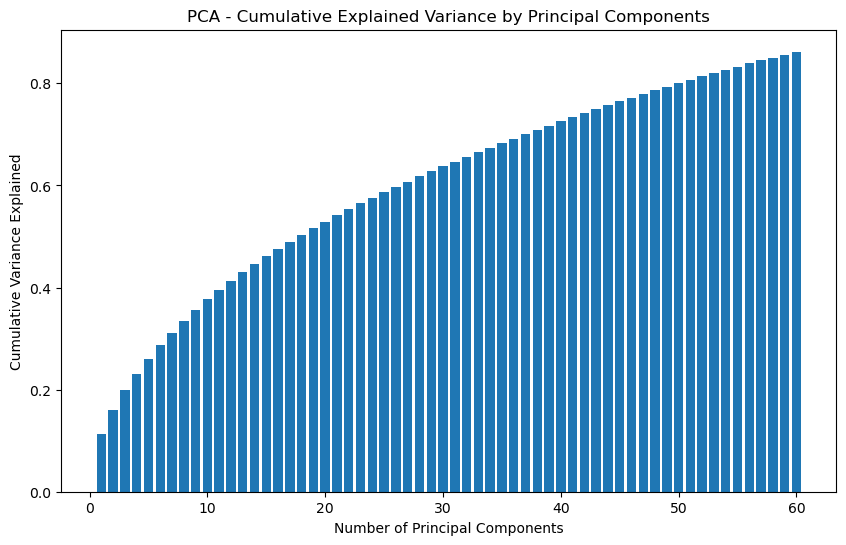

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=60)
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(f"{sum(explained_variance)*100:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Explained Variance by Principal Components')
plt.show()


In [46]:
feature_contributions = pd.DataFrame(pca.components_, columns=data.columns)
feature_contributions

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,...,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SalePrice
0,0.002838,-0.029800,-0.036151,0.102102,-0.058245,-0.033999,-0.061729,-0.019546,0.029235,-0.074190,...,0.000992,-0.027398,-0.014945,-0.009025,0.011459,0.057159,0.014182,0.0,-0.101091,-0.233768
1,-0.002779,0.213097,0.174256,0.162823,-0.240739,-0.061473,-0.229028,0.004432,0.159111,-0.067700,...,-0.020651,-0.062279,-0.001493,0.019641,0.048031,0.044110,0.022369,0.0,-0.040501,-0.060609
2,0.003553,-0.096788,-0.051213,-0.030689,0.061806,0.115837,0.202574,0.002415,-0.000486,0.030102,...,0.003063,-0.010980,-0.023522,-0.010166,-0.044683,0.091828,0.005108,0.0,-0.087899,0.086780
3,-0.001314,0.305855,0.040375,0.031899,-0.058375,-0.162085,-0.079754,0.021262,0.027692,0.018058,...,0.011454,0.038827,0.025139,0.003061,-0.017766,-0.038167,-0.024651,-0.0,0.084592,0.021151
4,0.008936,0.171574,0.059914,-0.002060,-0.024872,-0.052908,-0.102790,-0.011325,0.012246,-0.056217,...,0.005929,-0.028812,0.007687,0.001559,0.030548,0.103674,-0.013686,-0.0,-0.045146,-0.036597
5,-0.010117,0.027542,0.052016,0.140702,-0.160603,0.025097,-0.021708,-0.018255,0.133141,-0.035244,...,-0.004179,-0.061412,-0.046660,0.024317,0.030737,-0.005809,0.018439,-0.0,-0.021426,0.079507
6,-0.017744,-0.074935,-0.068296,-0.126540,0.142022,-0.046362,0.081503,0.027556,-0.100345,0.138665,...,-0.003533,0.091880,0.031971,-0.034176,-0.094034,-0.038930,-0.005926,0.0,0.067782,-0.069852
7,0.039304,0.008086,-0.106153,0.056549,0.014408,-0.072857,0.003833,-0.033442,-0.017045,0.073492,...,-0.047593,0.040690,0.014494,0.047543,-0.019744,0.103347,0.037180,0.0,-0.072196,0.084468
8,-0.034979,0.039091,0.035762,0.139717,-0.149954,0.028906,-0.031426,-0.035182,0.023939,-0.017344,...,-0.042981,-0.024105,0.076802,0.177028,-0.078828,-0.097958,0.030353,-0.0,0.062889,0.006045
9,0.000806,0.091127,0.020461,0.016608,0.001706,-0.018111,0.026508,-0.120816,0.028852,0.104655,...,0.033866,0.012588,-0.049655,-0.005875,0.017034,0.002827,0.026957,0.0,0.000515,0.013659


In [50]:
pca_data = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-3.474246,0.941672,0.017316,1.414585,-0.273716,-1.397135,1.276236,0.709090,0.740540,-0.968121,...,-0.073864,-0.585188,-0.064844,0.325688,-0.256289,-0.526079,0.259208,0.207050,0.383334,-0.329534
1,0.525494,-2.442026,-0.783676,-0.379160,-1.433195,0.406832,0.378624,0.308045,1.944752,0.483294,...,-0.205098,0.439671,0.423064,0.249467,1.014300,-0.974670,-0.405213,-0.351277,0.706344,1.071309
2,-4.107494,0.289190,0.433713,1.223210,-0.531528,-0.812276,1.171119,1.039779,0.202081,-0.453429,...,-0.114503,0.013638,0.610697,-0.031812,-0.020023,-1.156034,-0.192649,0.166754,-0.000002,-0.399590
3,0.289856,1.066942,1.161987,-0.116237,-1.758566,1.356585,-0.033244,-0.562169,-0.321711,2.185166,...,-1.321828,0.962266,1.538504,-0.019312,-0.849829,0.039478,-0.656984,0.997920,0.604916,1.568977
4,-5.997529,-1.031445,2.276586,1.916449,-0.379291,-0.756045,0.252572,0.658852,1.316294,-0.372150,...,0.534941,1.179876,1.647760,0.313857,0.611313,0.239747,0.605126,-0.339590,-0.630915,-0.260947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-2.295636,3.218861,-1.952270,-1.669932,0.362041,0.582435,0.435248,0.105026,0.752267,-0.796308,...,0.100568,0.661314,0.118654,-1.092231,0.803133,-0.375382,-0.453597,0.392421,-0.603883,0.715962
1216,-1.792904,2.282987,1.353997,0.653326,-1.322276,-0.931950,1.880462,-0.516033,-1.476629,-0.826834,...,-0.007161,0.431747,-0.289887,-0.090037,-0.180616,0.501682,0.130732,0.398904,0.084126,0.421396
1217,-1.567757,-4.497140,0.052636,-0.334529,0.952369,0.179602,-0.661722,0.001184,0.523104,0.615895,...,-0.119618,0.450531,-1.403605,-0.783670,1.036377,0.715258,0.241160,-0.090804,-0.598736,1.210421
1218,3.910669,-2.846756,-2.472041,-1.676392,-0.504506,1.736034,-0.514314,1.007953,-0.167296,-0.970150,...,0.830978,0.949827,-0.438676,1.104364,0.272009,-0.600685,-1.306182,-0.541204,-0.144922,0.610076


In [52]:
PCA_DATA = pd.concat([ID, pca_data, Y], axis=1)
PCA_DATA

,Id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,SalePrice
0,1,-3.474246,0.941672,0.017316,1.414585,-0.273716,-1.397135,1.276236,0.709090,0.740540,...,-0.585188,-0.064844,0.325688,-0.256289,-0.526079,0.259208,0.207050,0.383334,-0.329534,208500
1,2,0.525494,-2.442026,-0.783676,-0.379160,-1.433195,0.406832,0.378624,0.308045,1.944752,...,0.439671,0.423064,0.249467,1.014300,-0.974670,-0.405213,-0.351277,0.706344,1.071309,181500
2,3,-4.107494,0.289190,0.433713,1.223210,-0.531528,-0.812276,1.171119,1.039779,0.202081,...,0.013638,0.610697,-0.031812,-0.020023,-1.156034,-0.192649,0.166754,-0.000002,-0.399590,223500
3,4,0.289856,1.066942,1.161987,-0.116237,-1.758566,1.356585,-0.033244,-0.562169,-0.321711,...,0.962266,1.538504,-0.019312,-0.849829,0.039478,-0.656984,0.997920,0.604916,1.568977,140000
4,5,-5.997529,-1.031445,2.276586,1.916449,-0.379291,-0.756045,0.252572,0.658852,1.316294,...,1.179876,1.647760,0.313857,0.611313,0.239747,0.605126,-0.339590,-0.630915,-0.260947,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1455,-2.295636,3.218861,-1.952270,-1.669932,0.362041,0.582435,0.435248,0.105026,0.752267,...,0.661314,0.118654,-1.092231,0.803133,-0.375382,-0.453597,0.392421,-0.603883,0.715962,185000
1216,1456,-1.792904,2.282987,1.353997,0.653326,-1.322276,-0.931950,1.880462,-0.516033,-1.476629,...,0.431747,-0.289887,-0.090037,-0.180616,0.501682,0.130732,0.398904,0.084126,0.421396,175000
1217,1457,-1.567757,-4.497140,0.052636,-0.334529,0.952369,0.179602,-0.661722,0.001184,0.523104,...,0.450531,-1.403605,-0.783670,1.036377,0.715258,0.241160,-0.090804,-0.598736,1.210421,210000
1218,1459,3.910669,-2.846756,-2.472041,-1.676392,-0.504506,1.736034,-0.514314,1.007953,-0.167296,...,0.949827,-0.438676,1.104364,0.272009,-0.600685,-1.306182,-0.541204,-0.144922,0.610076,142125


In [54]:
PCA_DATA.to_csv('pca_data.csv', index=False)